In [13]:
from datasets import load_dataset
from tqdm import tqdm

# Define the list of GLUE and SuperGLUE tasks and datasets you want to load
glue_tasks = ["cola", "sst2", "mrpc", "stsb", "qqp", "mnli", "qnli", "rte", "wnli"]

# Load the GLUE datasets
glue_datasets = {}
glue_skripts = {}
for task in tqdm(glue_tasks):
    dataset = load_dataset("glue", task, split="train")
    glue_datasets[task] = dataset

100%|█████████████████████████████████████████████| 9/9 [00:07<00:00,  1.20it/s]


In [17]:
superglue_tasks = ["boolq", "cb", "copa", "multirc", "record", "rte", "wic", "wsc"]

# Load the SuperGLUE datasets
superglue_datasets = {}
superglue_skripts = {}
for task in superglue_tasks:
    dataset = load_dataset("super_glue", task, split="train")
    superglue_datasets[task] = dataset


In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt

def EDA(dataset):
  print(dataset.info.description)

  # Display a few random samples
  print(dataset.shuffle(seed=42).select(range(5)))

  # Calculate basic statistics
  num_samples = len(dataset)
  print("Number of samples:", num_samples)

  for i in dataset.column_names:
      if type(dataset[i][0]) == str:
        print(f'Average word count in "{i}": {round(sum(list(map(len, dataset[i])))/len(list(map(len, dataset[i]))))}')

  # Vocabulary analysis
  vocabulary = set()
  for i in dataset.column_names:
    if type(dataset[i][0]) == str:
      for example in dataset[i]:
          vocabulary.update(example.split())
  vocab_size = len(vocabulary)
  print("Vocabulary size:", vocab_size)

  # Class distribution
  labels = pd.Series(dataset["label"])
  class_counts = labels.value_counts()
  print("Class distribution:")
  print(class_counts)

  # Word frequency
  word_freq = {}
  # nltk.download('stopwords')
  sw = stopwords.words('english')
  for i in dataset.column_names:
    if type(dataset[i][0]) == str:
      for example in dataset[i]:
        words = example.split()
        for word in words:
          word = word.lower()
          if word not in sw:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
  top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:100])
  # print(top_words)
  plt.figure(figsize=(25,5))
  plt.xticks(rotation = 60)
  plt.bar(top_words.keys(), top_words.values(), width=.5, color='g')


[nltk_data] Downloading package stopwords to /home/sasha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


GLUE, the General Language Understanding Evaluation benchmark
(https://gluebenchmark.com/) is a collection of resources for training,
evaluating, and analyzing natural language understanding systems.


Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 5
})
Number of samples: 635
Average word count in "sentence1": 105
Average word count in "sentence2": 44
Vocabulary size: 1673
Class distribution:
0    323
1    312
Name: count, dtype: int64


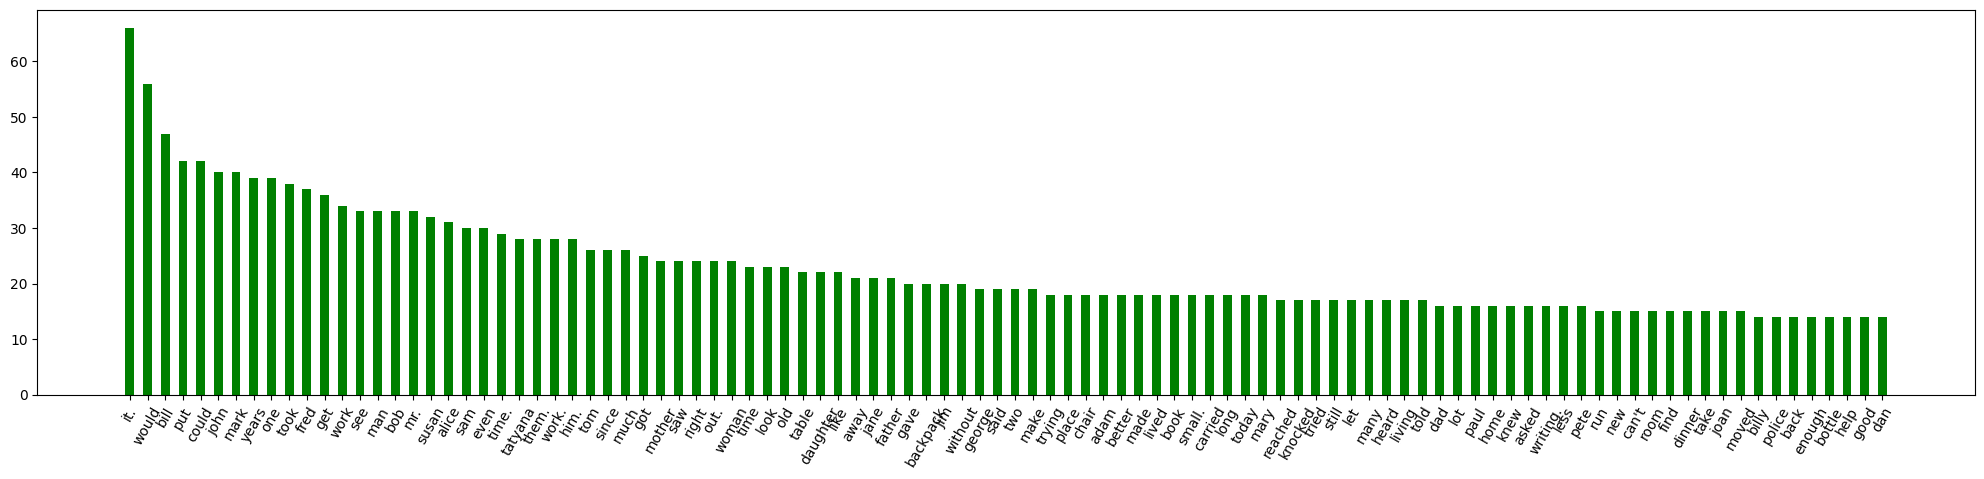

In [52]:
EDA(glue_datasets['wnli']) # "sst2", "mrpc", "stsb", "qqp", "mnli", "qnli", "rte", "wnli"]

DatasetInfo(description="SuperGLUE (https://super.gluebenchmark.com/) is a new benchmark styled after\nGLUE with a new set of more difficult language understanding tasks, improved\nresources, and a new public leaderboard.\n\nThe Recognizing Textual Entailment (RTE) datasets come from a series of annual competitions\non textual entailment, the problem of predicting whether a given premise sentence entails a given\nhypothesis sentence (also known as natural language inference, NLI). RTE was previously included\nin GLUE, and we use the same data and format as before: We merge data from RTE1 (Dagan\net al., 2006), RTE2 (Bar Haim et al., 2006), RTE3 (Giampiccolo et al., 2007), and RTE5 (Bentivogli\net al., 2009). All datasets are combined and converted to two-class classification: entailment and\nnot_entailment. Of all the GLUE tasks, RTE was among those that benefited from transfer learning\nthe most, jumping from near random-chance performance (~56%) at the time of GLUE's launch to\n85% a

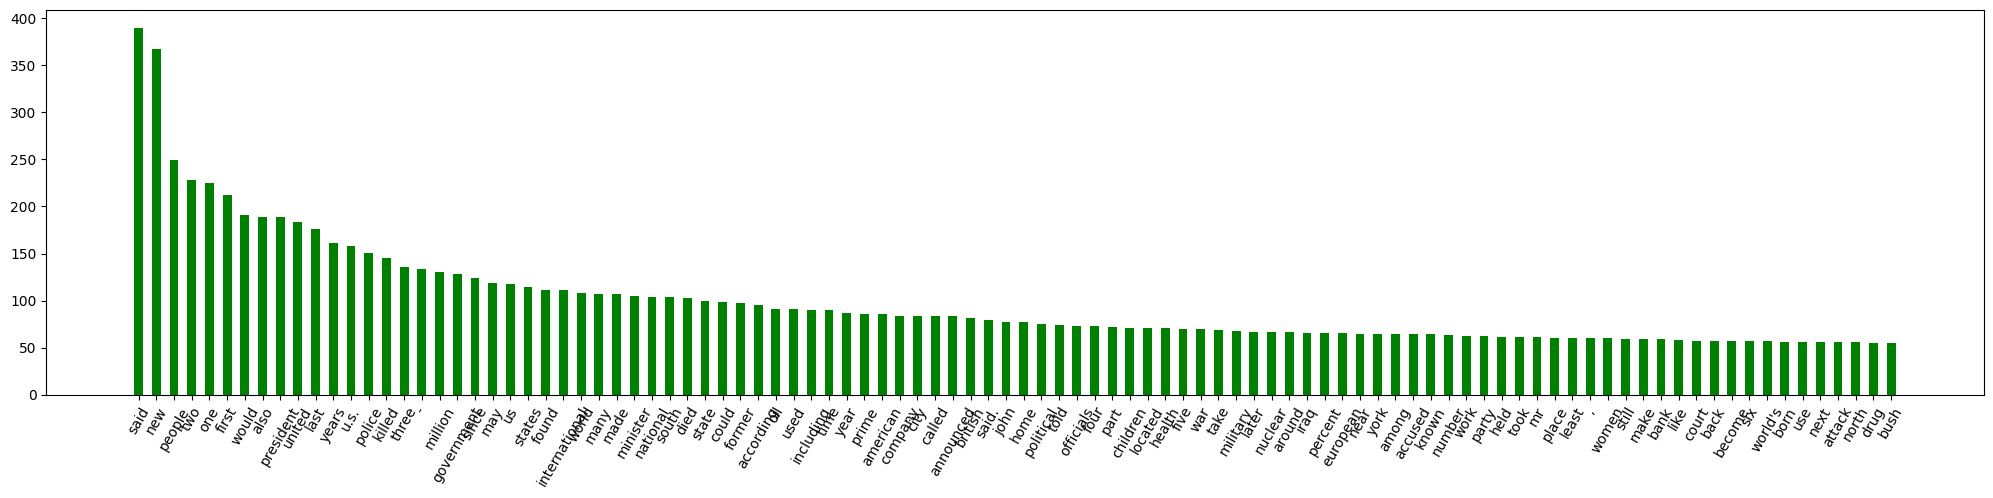

In [ ]:
EDA(superglue_datasets['rte'])